In [ ]:
import pandas as pd
import numpy as np

from keras import optimizers, losses, activations, models
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler, ReduceLROnPlateau
from keras.layers import Dense, Input, Dropout, Convolution1D, MaxPool1D, GlobalMaxPool1D, GlobalAveragePooling1D, concatenate
from sklearn.metrics import f1_score, accuracy_score

import tensorflow as tf
from keras import Input, Model, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import losses
from tensorflow import keras
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import regularizers
from keras.utils import np_utils
from keras import utils
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### CNN MITBIH

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/MLHC_PROJECT1/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)
df_test = pd.read_csv("/content/drive/MyDrive/MLHC_PROJECT1/mitbih_test.csv", header=None)

y_train = np.array(df_train[187].values).astype(np.int8)
X_train = np.array(df_train[list(range(187))].values)[..., np.newaxis]

y_test = np.array(df_test[187].values).astype(np.int8)
X_test = np.array(df_test[list(range(187))].values)[..., np.newaxis]

In [ ]:
# create the model
model = Sequential()
model.add(Conv1D(128, 55, activation='relu', input_shape=(187, 1)))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Conv1D(128, 25, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.1))
model.add(Conv1D(128, 10, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
# model.add(Flatten())
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, kernel_initializer='normal', activation='softmax'))

# model.summary()

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=losses.sparse_categorical_crossentropy, metrics=['acc'])

file_path = "/content/drive/MyDrive/MLHC_PROJECT1/CNN.h5"
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)
print("Number of weights: {}".format(model.count_params()))

Number of weights: 737413


In [ ]:
callbacks = [
             ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max'),
             ReduceLROnPlateau(monitor="val_acc", mode="max", patience=3, verbose=2),
             EarlyStopping(monitor="val_acc", mode="max", patience=5, verbose=1)
             ]

history = model.fit(X_train, y_train, epochs=100, verbose=2, callbacks=callbacks, validation_split=0.1)

Epoch 1/100

Epoch 1: val_acc improved from -inf to 0.95066, saving model to /content/drive/MyDrive/MLHC_PROJECT1/transformer.h5
2463/2463 - 25s - loss: 0.3502 - acc: 0.9032 - val_loss: 0.1877 - val_acc: 0.9507 - lr: 0.0010 - 25s/epoch - 10ms/step
Epoch 2/100

Epoch 2: val_acc improved from 0.95066 to 0.96300, saving model to /content/drive/MyDrive/MLHC_PROJECT1/transformer.h5
2463/2463 - 12s - loss: 0.1834 - acc: 0.9523 - val_loss: 0.1320 - val_acc: 0.9630 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 3/100

Epoch 3: val_acc improved from 0.96300 to 0.97396, saving model to /content/drive/MyDrive/MLHC_PROJECT1/transformer.h5
2463/2463 - 13s - loss: 0.1421 - acc: 0.9619 - val_loss: 0.0965 - val_acc: 0.9740 - lr: 0.0010 - 13s/epoch - 5ms/step
Epoch 4/100

Epoch 4: val_acc did not improve from 0.97396
2463/2463 - 12s - loss: 0.1240 - acc: 0.9660 - val_loss: 0.0930 - val_acc: 0.9734 - lr: 0.0010 - 12s/epoch - 5ms/step
Epoch 5/100

Epoch 5: val_acc improved from 0.97396 to 0.97545, saving mode

In [ ]:
pred_test = model.predict(X_test)
pred_test = np.argmax(pred_test, axis=-1)

f1 = f1_score(y_test, pred_test, average="macro")

print("Test f1 score : %s "% f1)

acc = accuracy_score(y_test, pred_test)

print("Test accuracy score : %s "% acc)

Test f1 score : 0.9014285666208736 
Test accuracy score : 0.9814087337840307 


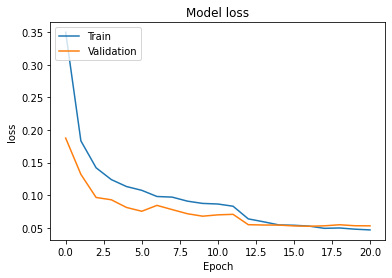

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

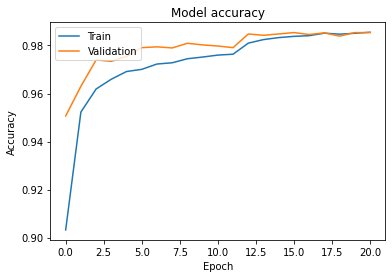

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

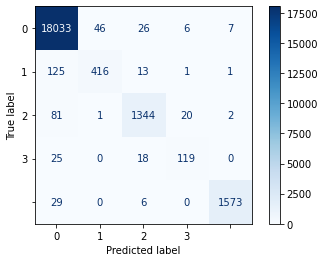

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, pred_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3])

disp.plot(cmap=plt.cm.Blues)
plt.show()